In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import sys
print(qt.__version__)


5.0.4


In [18]:
def create_random_state(n):
        basis_states = [qt.basis([2]*n, [int(i) for i in format(j, f'0{n}b')]) for j in range(2**n)]
        uniform_values = np.random.uniform(0, 1, 2**n)
        coefficients = uniform_values / np.sqrt(np.sum(uniform_values**2))
    
        random_state = sum(coeff * basis for coeff, basis in zip(coefficients, basis_states))
        return random_state


def compute_density_matrix(state):
        return state * state.dag()

def state_0(n):
    return qt.tensor([qt.basis(2, 0) for _ in range(n)])

def state_1(n):
    return qt.tensor([qt.basis(2, 1) for _ in range(n)])



In [24]:
n = 100000
num_qubits = 2
I_N = np.zeros(n)
f_N = np.zeros(n)
Z = qt.sigmaz()

for i in range(0,n):
    percent = ((i + 1) / n) * 100
    sys.stdout.write(f"\rProgress: {percent:.2f}%")
    sys.stdout.flush()
    random_state_1 = create_random_state(num_qubits)
    random_state_2 = create_random_state(num_qubits)
    random_state_3 = create_random_state(num_qubits)

    state1 = state_1(num_qubits)
    state0 = state_0(num_qubits)

    p_random_1 = compute_density_matrix(random_state_1)
    p_random_2 = compute_density_matrix(random_state_2)
    p_random_3 = compute_density_matrix(random_state_3)
    p_0 = compute_density_matrix(state0)
    p_1 = compute_density_matrix(state1)

    p_mixed = (1/5) * (p_random_1 + p_random_2 + p_random_3 + (p_0 + p_1))
    Z_full = qt.tensor(*[Z for _ in range(num_qubits)])
    z = np.zeros(num_qubits+1)
    s = np.zeros(num_qubits+1)

    for X in range(0,num_qubits):
            a = p_mixed.ptrace([X])

            s[X] = qt.entropy_vn(a)
            z[X] = np.real((a @ Z).tr())
            a = 0

    s[num_qubits] = qt.entropy_vn(p_mixed)
    I_N[i] = sum(s[:-1]) - s[-1]  

    z[num_qubits] = np.real((p_mixed @ Z_full).tr())
    f_N[i] = (z[-1] -np.prod(z[:-1]))**2/(2*num_qubits) 





Progress: 0.00%

Progress: 100.00%

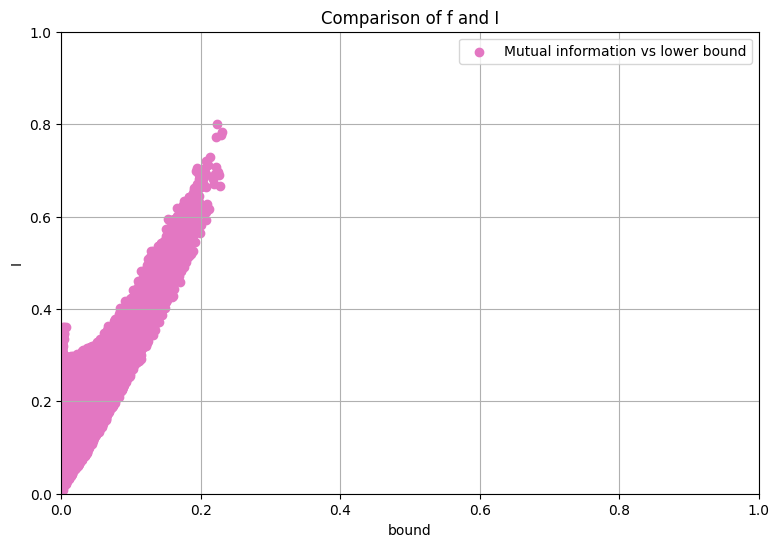

In [25]:
plt.figure(figsize=(9, 6))

plt.scatter(f_N, I_N, color = '#e377c2', marker='o',  label='Mutual information vs lower bound')


plt.xlabel('bound')
plt.ylabel('I')
plt.title('Comparison of f and I')
plt.grid(True)
plt.xlim(0, 1)  # Adjust x limits based on your data
plt.ylim(0, 1)  # Adjust y limits based on your data
plt.legend()

plt.show()



## coefficients test

[0.00094247 0.00069288 0.00132646 ... 0.00129651 0.00100088 0.00069769]


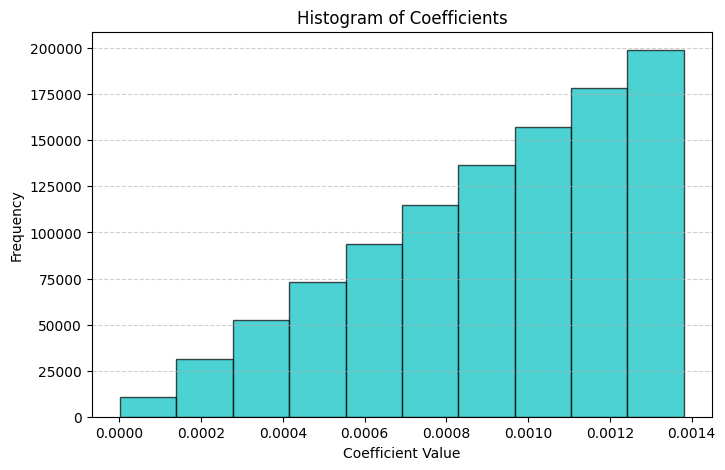

In [41]:
m = 20
random_probs = np.random.rand(2**m)
random_probs /= np.sum(random_probs)  # Normalize to sum to 1
coefficients = np.sqrt(random_probs)
print(coefficients)
# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(coefficients, bins=10, color='c', edgecolor='black', alpha=0.7)

# Formatting
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.title('Histogram of Coefficients')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

## New version

Sum of squares: 0.9999999999999999


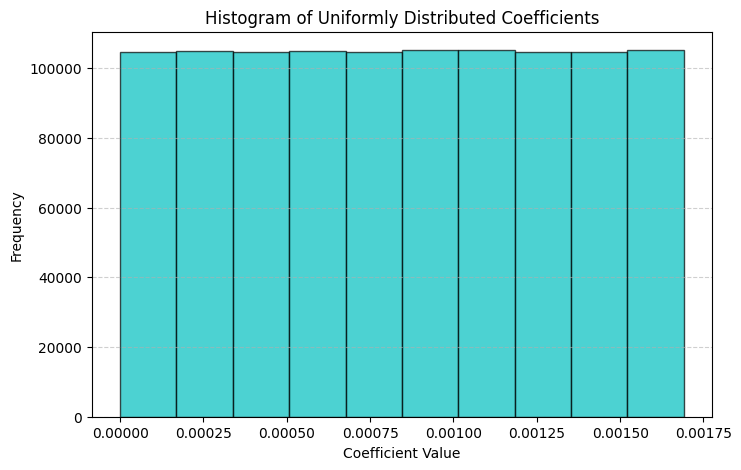

In [83]:


m = 20  
n = 2**m  
uniform_values = np.random.uniform(0, 1, n)
coefficients = uniform_values / np.sqrt(np.sum(uniform_values**2))

# Verify normalization
print("Sum of squares:", np.sum(coefficients**2))  # Should be very close to 1

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(coefficients, bins=10, color='c', edgecolor='black', alpha=0.7)

# Formatting
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.title('Histogram of Uniformly Distributed Coefficients')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
